In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

/var/folders/_z/q4gsch7n2jn4pky14jnx_2p80000gn/T/ipykernel_70870/3012821911.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# df contains ratings, not restaurant aggregate info??
df = pd.read_csv('yelp_boston.csv')
df.drop(inplace=True, columns=["url"])

# Figuring out merging rows about the same restaurant

In [3]:
df

,name,review_count,categories_json,rating,snippet_text,location_json,neighborhood,latitude,longitude,search category
0,Wheelhouse,101,"[[""Breakfast & Brunch"", ""breakfast_brunch""], [...",4.5,"After going to Wheelhouse, you'll never order ...","{""cross_streets"": ""Milk St & Batterymarch Arm""...",Financial District,42.357926,-71.053962,restaurants
1,Tenoch Mexican,121,"[[""Mexican"", ""mexican""]]",4.5,"So it's official, folks. We've finished our sa...","{""city"": ""Boston"", ""display_address"": [""3 Lewi...",North End,42.363309,-71.051800,restaurants
2,O Ya,450,"[[""Japanese"", ""japanese""]]",4.5,My husband and I came here to celebrate our 20...,"{""city"": ""Boston"", ""display_address"": [""9 E St...",Waterfront,42.351408,-71.056867,restaurants
3,Locale,121,"[[""Italian"", ""italian""], [""Pizza"", ""pizza""]]",4.5,Truly thankful that we stumbled on Locale whil...,"{""cross_streets"": ""Fleet St & Tileston St"", ""c...",North End,42.365085,-71.053187,restaurants
4,Neptune Oyster,2487,"[[""Seafood"", ""seafood""], [""Live/Raw Food"", ""ra...",4.5,Best lobster roll on the whole trip..... and I...,"{""cross_streets"": ""Hull St & Stillman St"", ""ci...",North End,42.363618,-71.056012,restaurants
...,...,...,...,...,...,...,...,...,...,...
338,El Madina,8,"[[""Mediterranean"", ""mediterranean""], [""Middle ...",4.5,I went in around closing tonight because I was...,"{""city"": ""Revere"", ""display_address"": [""148 Sq...",NaN,42.423248,-71.009514,ethnicmarkets
339,The Shops at Porter,79,"[[""Japanese"", ""japanese""], [""Ethnic Food"", ""et...",4.0,This is like a small (chibi) version of the Ja...,"{""city"": ""Cambridge"", ""display_address"": [""Uni...",Porter Square,42.387192,-71.118778,ethnicmarkets
340,Bazaar International Gourmet,52,"[[""Ethnic Food"", ""ethnicmarkets""], [""Grocery"",...",4.0,"The Bazaar at 1432 Beacon Street, Brookline Ma...","{""city"": ""Brookline"", ""display_address"": [""143...",Coolidge Corner,42.341065,-71.126470,ethnicmarkets
341,G Mart 2 Supermarket,48,"[[""Grocery"", ""grocery""], [""Ethnic Food"", ""ethn...",4.0,Everything is inexpensive! I was so surprised ...,"{""cross_streets"": ""Beach St & Tufts St"", ""city...",Waterfront,42.351569,-71.058365,ethnicmarkets


In [4]:
df['categories_list'] = df['categories_json'].apply(lambda x: [i[1] for i in json.loads(x)])

In [5]:
df['search category in categoryList'] = df.apply(lambda x: x['search category'] in x['categories_list'], axis=1)

In [6]:
# merging rows with overlapping data
counts = df.name.value_counts()

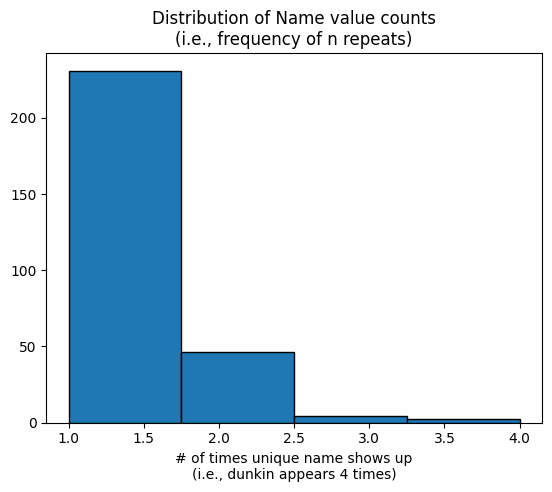

In [7]:
plt.hist(counts.values, bins=4, edgecolor='black')

plt.title('Distribution of Name value counts\n(i.e., frequency of n repeats)')

plt.xlabel('# of times unique name shows up\n(i.e., dunkin appears 4 times)')
plt.show()

In [8]:
df[df['name']=="Dunkin' Donuts"]

,name,review_count,categories_json,rating,snippet_text,location_json,neighborhood,latitude,longitude,search category,categories_list,search category in categoryList
262,Dunkin' Donuts,30,"[[""Donuts"", ""donuts""], [""Coffee & Tea"", ""coffe...",4.0,"A tiny little store, just like the donut holes...","{""cross_streets"": ""Fairfield St & Exeter St"", ...",Back Bay,42.349651,-71.080002,donuts,"[donuts, coffee]",True
264,Dunkin' Donuts,12,"[[""Donuts"", ""donuts""], [""Coffee & Tea"", ""coffe...",4.0,The folks that work at this dunks are some tou...,"{""cross_streets"": ""Ellery St"", ""city"": ""Boston...",South Boston,42.329740,-71.057260,donuts,"[donuts, coffee]",True
266,Dunkin' Donuts,27,"[[""Donuts"", ""donuts""], [""Coffee & Tea"", ""coffe...",3.5,I am a huge fan of Dunkin' Donuts!!! \nI am al...,"{""cross_streets"": ""Tamworth St & Tremont St"", ...",NaN,42.352249,-71.064888,donuts,"[donuts, coffee]",True
267,Dunkin' Donuts,9,"[[""Coffee & Tea"", ""coffee""], [""Donuts"", ""donut...",3.5,My iced coffees and food (whether it be a sand...,"{""city"": ""Boston"", ""display_address"": [""530 Co...",NaN,42.348648,-71.096077,donuts,"[coffee, donuts]",True


In [9]:
# take the case of dunkin, there are four entries each with DISTINCT locations, we would Not want to merge these

# could maybe use keywords from aggregate list of reviews for each restaurant like this, but not sure how many of 
# these types of rows there are (ie ones with the same name but diff locs)

dunkinList = df[df['name']=="Dunkin' Donuts"].index

# for idx in dunkinList:
#     for idx2 in dunkinList:
#         if idx != idx2:
#             display(df.loc[idx] == df.loc[idx2])

In [10]:
# some rows have almost completely duplicate info, like this one, Oppa Sushi rows 135 and 157
# everything is the same EXCEPT search category, would want to replace value with list with both values?
df[df['name']=="Oppa Sushi"]

,name,review_count,categories_json,rating,snippet_text,location_json,neighborhood,latitude,longitude,search category,categories_list,search category in categoryList
135,Oppa Sushi,32,"[[""Sushi Bars"", ""sushi""], [""Japanese"", ""japane...",4.0,My husband and I are always looking for a good...,"{""cross_streets"": ""Commonwealth Ave & Glenvill...",Allston/Brighton,42.350904,-71.131315,sushi,"[sushi, japanese, seafood]",True
157,Oppa Sushi,32,"[[""Sushi Bars"", ""sushi""], [""Japanese"", ""japane...",4.0,My husband and I are always looking for a good...,"{""cross_streets"": ""Commonwealth Ave & Glenvill...",Allston/Brighton,42.350904,-71.131315,japanese,"[sushi, japanese, seafood]",True


## Can check distinct restaurant locations based on unique location json, then choose merge behavior

In [11]:
df['categories_list'].apply(lambda x: len(x))

0      3
1      1
2      1
3      2
4      2
      ..
338    3
339    3
340    2
341    2
342    3
Name: categories_list, Length: 343, dtype: int64

In [12]:
unique_categories = set()
categories_counts = {}


for id, row in df.iterrows():
    categories = json.loads(row["categories_json"])
    for category_pair in categories:
        category = category_pair[1]
        unique_categories.add(category)
        if category not in categories_counts:
            categories_counts[category] = 1
        else:
            categories_counts[category] += 1

In [13]:
# sorted_items = sorted(my_dict.items(), key=lambda item: item[1])

dict(sorted(categories_counts.items(), key=lambda x: x[1], reverse=True))

{'sandwiches': 43,
 'italian': 41,
 'coffee': 39,
 'japanese': 37,
 'sushi': 35,
 'newamerican': 33,
 'pizza': 32,
 'bakeries': 28,
 'vietnamese': 25,
 'cafes': 23,
 'thai': 23,
 'mexican': 21,
 'indpak': 21,
 'donuts': 20,
 'french': 19,
 'ethnicmarkets': 19,
 'chinese': 18,
 'breakfast_brunch': 15,
 'seafood': 15,
 'delis': 11,
 'grocery': 10,
 'bars': 9,
 'desserts': 9,
 'salad': 7,
 'korean': 7,
 'asianfusion': 7,
 'burgers': 6,
 'lounges': 6,
 'foodtrucks': 6,
 'vegan': 5,
 'cocktailbars': 5,
 'icecream': 5,
 'wine_bars': 4,
 'tapasmallplates': 4,
 'vegetarian': 4,
 'hotpot': 4,
 'mediterranean': 3,
 'catering': 3,
 'pakistani': 3,
 'tradamerican': 2,
 'pubs': 2,
 'bubbletea': 2,
 'hotdogs': 2,
 'greek': 2,
 'mideastern': 2,
 'raw_food': 1,
 'gluten_free': 1,
 'spanish': 1,
 'juicebars': 1,
 'belgian': 1,
 'gastropubs': 1,
 'steak': 1,
 'cheese': 1,
 'cheesesteaks': 1,
 'diners': 1,
 'turkish': 1,
 'falafel': 1,
 'bangladeshi': 1,
 'himalayan': 1,
 'halal': 1,
 'ramen': 1,
 'mongo

In [29]:
cuisineCategories = {
    "Cuisine": {
        "Italian": ["italian", "pizza"],
        "Asian": ["japanese", "sushi", "vietnamese", "thai", "chinese", "korean", "asianfusion", "pakistani",
                  "bangladeshi", "himalayan", "mongolian", "dimsum", "cantonese", "armenian", "hotpot"],
        "American": ["newamerican", "tradamerican"],
        "Mexican & Latin": ["mexican", "latin"],
        "Indian & Middle Eastern": ["indpak", "mideastern", "turkish", "falafel", "halal"],
        "European": ["french", "greek", "mediterranean", "spanish", "belgian", "polish", "ukrainian"],
        "Comfort Food": ["pizza", "burgers", "cheese", "cheesesteaks", "hotdogs", "steak"]
    },
    "Food Type": {
        "Bakery & Sweets": ["bakeries", "donuts", "desserts", "cupcakes"],
        "Breakfast & Brunch": ["coffee", "breakfast_brunch"],
        "Healthy & Specialty": ["salad", "vegan", "vegetarian", "raw_food", "gluten_free"],
        "Seafood": ["seafood", "sushi"],
        "Beverages": ["coffee", "bubbletea", "juicebars"],
        "Snacks": ["icecream", "tapasmallplates", "ramen"]
    },
    "Venue Type": {
        "Casual & Quick Bites": ["sandwiches", "cafes", "delis", "foodtrucks", "fastfood", "hotdogs", "diners"],
        "Markets": ["ethnicmarkets", "grocery"],
        "Dining & Bars": ["bars", "lounges", "cocktailbars", "wine_bars", "pubs", "gastropubs"],
        "Service Oriented": ["catering", "foodstands"],
        "Shopping": ["shopping"]
    }
}

In [30]:
# Function to recursively find all strings (both keys and values) in a complex dictionary
def find_all_strings(d, all_strings):
    for k, v in d.items():
        # Add key to the list
        all_strings.add(k)
        # If value is a string, add to the list
        if isinstance(v, str):
            all_strings.add(v)
        # If value is a list, add each string element in the list
        elif isinstance(v, list):
            for item in v:
                if isinstance(item, str):
                    all_strings.add(item)
        # If value is a dictionary, recursively find strings
        elif isinstance(v, dict):
            find_all_strings(v, all_strings)


# Create an empty set to hold all unique strings
all_strings = set()

# Call the function with the complex dictionary
# We assume that the variable 'complex_dict' is the dictionary provided above
find_all_strings(cuisineCategories, all_strings)

# Convert the set to

In [31]:
categoriesInHeirarch = {category: all_strings.__contains__(category) for category in unique_categories}
{category: n for category, n in categoriesInHeirarch.items() if not (n)}

{}

In [76]:
df = pd.DataFrame(list(categories_counts.items()), columns=['Category', 'Count'])

# Convert the DataFrame to a CSV format string (without the index, with headers)
# csv_string = df.to_csv(index=False, header=True, sep='\t')

In [78]:
df.to_clipboard()

In [72]:
df['categories_list'].apply(pd.Series).to_clipboard()

In [18]:
print(unique_categories, len(unique_categories), sep="\n\n")

{'polish', 'icecream', 'bars', 'gluten_free', 'italian', 'belgian', 'french', 'raw_food', 'tradamerican', 'pubs', 'cocktailbars', 'pizza', 'dimsum', 'coffee', 'vegetarian', 'cupcakes', 'japanese', 'burgers', 'chinese', 'sandwiches', 'mexican', 'falafel', 'halal', 'vegan', 'cafes', 'ramen', 'foodtrucks', 'bangladeshi', 'steak', 'bakeries', 'shopping', 'donuts', 'tapasmallplates', 'vietnamese', 'grocery', 'mediterranean', 'cheesesteaks', 'thai', 'breakfast_brunch', 'pakistani', 'sushi', 'delis', 'mideastern', 'salad', 'bubbletea', 'desserts', 'mongolian', 'ukrainian', 'gastropubs', 'cantonese', 'asianfusion', 'ethnicmarkets', 'foodstands', 'korean', 'lounges', 'hotdogs', 'hotpot', 'cheese', 'newamerican', 'himalayan', 'catering', 'armenian', 'juicebars', 'diners', 'wine_bars', 'indpak', 'latin', 'seafood', 'greek', 'spanish', 'turkish'}

71


In [19]:
location_counts = df.location_json.value_counts()

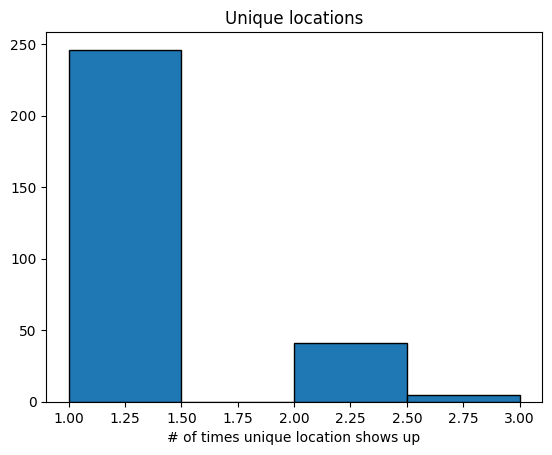

In [21]:
plt.hist(location_counts.values, bins=3, edgecolor='black')

plt.title('Unique locations')

plt.xlabel('# of times unique location shows up')
plt.show()

In [24]:
# but note this instance where 3 rows have identical location json strings, but DIFFERENT names,
# would want to merge two of these (the Banh Me Houses)

df[df.location_json == '''{"cross_streets": "Tremont St & Temple Pl", "city": "Boston", "display_address": ["48 Winter St", "Downtown", "Boston, MA 02108"], "geo_accuracy": 8.0, "neighborhoods": ["Downtown"], "postal_code": "02108", "country_code": "US", "address": ["48 Winter St"], "coordinate": {"latitude": 42.3559303, "longitude": -71.0619736}, "state_code": "MA"}'''].loc[:, ["name", "search category", "categories_json"]]

,name,search category,categories_json
84,Banh Mi House,sandwiches,"[[""Bubble Tea"", ""bubbletea""], [""Sandwiches"", ""..."
180,68 Chinese,chinese,"[[""Chinese"", ""chinese""]]"
305,Banh Mi House,vietnamese,"[[""Bubble Tea"", ""bubbletea""], [""Sandwiches"", ""..."


# Solution: 
For each row with same location json, check if the rows have the same name
Then check for whether everything except search category are equal (handling nas)

## Next steps: merging overlapping rows
- Maybe turn search category into a list, combine values where appropriate

### Note: overlapping coordinates
(i.e., above example with Banh Mi House and 86 Chinese idxs 84 180 305)

#### ***may need to jitter location on map?***

In [23]:
countBreakingExpectation = 0
for location in location_counts.index:
    currentLocRows = df[df['location_json']==location]
    for row in currentLocRows.index:
        for row2 in currentLocRows.index:
            if row != row2:
                # fills na values so they compare as equal
                comparison = (
                                 currentLocRows.loc[row].fillna(value="###NONE###") ==
                                 currentLocRows.loc[row2].fillna(value="###NONE###")
                )
                # if the names are equal
                if comparison['name']:
                    # check if follows expectation
                    if not(all(comparison.values[:-1]) & ~comparison.values[-1]):
                        print("not in line with theory")
                        print(row, row2)
                        countBreakingExpectation += 1
print("\n\n", countBreakingExpectation)                    



 0


In [73]:
df.apply(lambda x: x['search category'] in x['categories_list'])

KeyError: 'search category'